# **Grade Challenge 2**
### **HACTIV8 Full Time Data Science Phase 0**
Nama  : Ropiudin

Batch : FTDS OO2-HCK

Grade Challenge : Grade Challeng 2

# **Description**

## **Objectiv**

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Mathematics and Statistics. Pada Graded challenge ini menggunakanckumpulan data yang di ambil dari *bigquery-public-data* pada tabel *waste_and_diversion* di dataset *austin_waste*.

## **Problem Statement**

Disuatu Kota Austin Smart City akan menganalisa sistem pembuangan dan pengolahan sampah di kota tersebut berdasarkan data yang tersedia. Analisa sistem pembuangan dan pengelolaan sampah dapat menggunakan statistik deskriptif dan inferensial sehingga hasil dari analisa tersebut dapat memberikan masukan atau insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. Pada graded challenge kali ini, saya akan menganalisa sistem pembuangan dan pengelolaan sampah di kota Austin berdasarkan data yang tersedia.

# **Working Area**

Pada Grade Challenge ini, SQL Query yang di gunakan untuk mengakses datanya adalah sebagai berikut:
> 
SELECT report_date,
      load_time,
      load_type,
      load_weight,
      dropoff_site
FROM `bigquery-public-data.austin_waste.waste_and_diversion`
WHERE CAST(report_date AS STRING) LIKE '%2021%'
ORDER BY report_date ASC
>
Untuk library yang digunakan pada graded challenge, yang menggunakan library pandas, numpy, scipy, seaborn dan matplotlib

In [81]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Problem 1 (Stats)**

In [82]:
df = pd.read_csv('h8dsft_P0GC2_Ropiudin.csv')
pd.set_option("display.precision", 2)
df

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


> Code di atas merupakan code untuk import data atau membaca data dari tabel yang akan digunakan, pd.set_optoin digunakan untuk menentukan banyaknya angka dibelakang koma pada data float dan df merupakan variabel untuk memanggil data yang di import

In [83]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


> Code df.head() di atas merupakan code untuk menampilkan tabel teratas yang bisa di tentukan jumlah baris yang mau di tampilkan pada variabel df

In [84]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


> Code df.tail() di atas merupakan code untuk menampilkan tabel terbawah yang bisa di tentukan jumlah baris yang mau di tampilkan pada variabel df

### 1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


> Code df.info() merupakan code untuk menampil kan informasi terkait data yang kita punya, yang berisikan jumlah baris dan kolom pada data serta nama - nama kolom yang terdapat pada data. Dan terdapat pula informasi missing values di setiap kolom pada data. 

> Pada kolom load_weight jumlah barisnya tidak sama dengan jumlah baris pada data, yang berarti pada kolom load_weight terdapat missing value

In [86]:
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

> Code df.isnull().sum() di atas merupakan code untuk menampilkan jumlah missing value di setiap kolom yang mana hanya terdapat missing value pada kolom load_weight yaitu sebanyak 1048

In [87]:
df.dropna(inplace=True)

In [88]:
df

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
5,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
11,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


> Pada kasus ini, untuk handling missing value saya gunakan code df.dropna(inplace=True) untuk menghapus missing value yang terdapat pada data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25109 entries, 4 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   25109 non-null  object 
 1   load_time     25109 non-null  object 
 2   load_type     25109 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  25109 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


> Sehingga apabila dilakukan df.info() untuk melihat informasi pada data, sudah tidak terdapat missing value lagi di setiap kolom pada data

### 2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

 - Melihat rentang waktu pengambilan data
 - Ada apa saja tipe load sampah di kota Austin berdasarkan data
 - Mengetahui tempat pembuangan sampah ada dimana saja
 - dsb.

In [90]:
df.loc[:, 'report_date'].min()

'2021-01-02'

> Code di atas merupakan code untuk menampilkan tanggal awal pengambilan data, yang mana pada tabel data di atas, awal pengambilan datanya yaitu pada tanggal 2021-01-02 

In [91]:
df.loc[:, 'report_date'].max()

'2021-07-09'

> Code di atas merupakan code untuk menampilkan tanggal akhir pengambilan data, yang mana pada tabel data di atas, terahil pengambilan datanya yaitu pada tanggal 2021-07-09 

In [92]:
df.loc[:, 'load_weight'].min()

0.0

> Code di atas merupakan code untuk melihat load_weight terkecil dari data, yang mana load_weight terkecil di setiap kali pembuangan sampah yaitu seberat 0 kg

In [93]:
df.loc[:, 'load_weight'].max()

245540.0

> Code di atas merupakan code untuk melihat load_weight terbesar dari data, yang mana load_weight terbesar di setiap kali pembuangan sampah yaitu seberat 245540 kg

In [94]:
df.groupby(['load_type'])['load_weight'].count().sort_values(ascending=False).reset_index()

,load_type,load_weight
0,GARBAGE COLLECTIONS,8241
1,RECYCLING - SINGLE STREAM,6760
2,ORGANICS,5749
3,BULK,1594
4,BRUSH,1514
5,SWEEPING,360
6,MIXED LITTER,329
7,TIRES,175
8,DEAD ANIMAL,150
9,YARD TRIMMING,137


> Code di atas merupakan code untuk melihat ada berapa banyak tipe load sampah yang terdapat pada data, dan kita juga bisa melihat seberapa kali di setiap tipe load sampah yang dibuang ke tempat pembuangan sampah

In [95]:
df.groupby(['dropoff_site'])['load_weight'].count().sort_values(ascending=False).reset_index()

,dropoff_site,load_weight
0,TDS LANDFILL,10691
1,ORGANICS BY GOSH,5741
2,BALCONES RECYCLING,3837
3,TDS - MRF,2948
4,HORNSBY BEND,1652
5,MRF,168
6,AUSTIN IRON AND METAL,50
7,ON ROUTE HIGH DUMP,7
8,GREAT NORTHERN,6
9,PARK BEND,4


> Code di atas merupakan code untuk melihat ada berapa banyak tempat pembuangan sampah yang terdapat pada data, dan kita juga bisa melihat seberapa kali tempat pembuangan sampah itu yang muncul pada data

In [96]:
df[
    (df['dropoff_site'] == 'TDS LANDFILL')
].groupby(['dropoff_site', 'load_type'])['load_weight'].count().sort_values(ascending=False).reset_index()

,dropoff_site,load_type,load_weight
0,TDS LANDFILL,GARBAGE COLLECTIONS,8203
1,TDS LANDFILL,BULK,1590
2,TDS LANDFILL,SWEEPING,358
3,TDS LANDFILL,MIXED LITTER,329
4,TDS LANDFILL,DEAD ANIMAL,131
5,TDS LANDFILL,LITTER,40
6,TDS LANDFILL,ORGANICS,22
7,TDS LANDFILL,TIRES,10
8,TDS LANDFILL,RECYCLING - SINGLE STREAM,3
9,TDS LANDFILL,BRUSH,2


> Code di atas merupakan code untuk melihat ada berapa banyak tipe load sampah yang terdapat pada tempat pembuangan sampah TDS LANDFILL, dan kita juga bisa melihat seberapa kali di setiap tipe load sampah yang dibuang ke tempat pembuangan sampah TDS LANDFILL

In [97]:
df[
    (df['dropoff_site'] == 'TDS LANDFILL')
].reset_index()

,index,report_date,load_time,load_type,load_weight,dropoff_site
0,16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
1,17,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL
2,18,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL
3,19,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL
4,20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL
...,...,...,...,...,...,...
10686,26097,2021-07-08,2021-07-08 02:04:00 UTC,GARBAGE COLLECTIONS,8380.0,TDS LANDFILL
10687,26098,2021-07-08,2021-07-08 02:27:00 UTC,BULK,2100.0,TDS LANDFILL
10688,26099,2021-07-08,2021-07-08 11:07:00 UTC,BULK,3500.0,TDS LANDFILL
10689,26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


> Code di atas merupakan code untuk melihat banyaknya data pada tempat pembuangan sampah TDS LANDFILL, yang mana pada tempat pembuangan sampah TDS LANDFILL terdapat data sebanyak 10691 baris

### 3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (Caution: Jangan gunakan pd.DataFrame.describe())

In [98]:
# rata - rata setiap kali membuang sampah bukan rata - rata per hari membuang sampah
df.groupby(['dropoff_site'])['load_weight'].mean().sort_values(ascending=False).reset_index() 

,dropoff_site,load_weight
0,GREAT NORTHERN,19153.33
1,WESTFIELD,16020.00
2,TDS LANDFILL,15169.41
3,PARK BEND,13385.00
4,ON ROUTE HIGH DUMP,12525.71
5,ORGANICS BY GOSH,11818.48
6,TDS - MRF,9872.55
7,BALCONES RECYCLING,9464.65
8,BALCONES WOODS,8460.00
9,HORNSBY BEND,6628.64


> Code di atas merupakan code untuk melihat rata - rata setiap kali membuang sampah di setiap tempat pembuangan sampah. Dari hasil di atas kita memperoleh informasi bahwa pada tempat pembuangan sampah GREAT NORTHERN memiliki rata - rata setiap kali membuang sampah yaitu sebesar 19153.33 kg

In [99]:
df.groupby(['dropoff_site'])['load_weight'].median().sort_values(ascending=False).reset_index()

,dropoff_site,load_weight
0,GREAT NORTHERN,21110.0
1,WESTFIELD,16020.0
2,ON ROUTE HIGH DUMP,14940.0
3,TDS LANDFILL,14920.0
4,PARK BEND,12330.0
5,ORGANICS BY GOSH,11920.0
6,TDS - MRF,10330.0
7,BALCONES RECYCLING,9840.0
8,BALCONES WOODS,8460.0
9,HORNSBY BEND,6390.0


> Code di atas merupakan code untuk melihat median atau nilai tengah yang sudah diurutkan datanya setiap kali membuang sampah di setiap tempat pembuangan sampah. Dari hasil di atas kita memperoleh informasi bahwa pada tempat pembuangan sampah GREAT NORTHERN memiliki nilai median setiap kali membuang sampah yaitu sebesar 21110.0 kg

In [100]:
df1 = pd.DataFrame({'dropoff_site':df['dropoff_site'],
                    'load_weight': df['load_weight']})

df1

,dropoff_site,load_weight
4,MRF,1640.0
5,MRF,940.0
6,TDS - MRF,320.0
7,TDS - MRF,520.0
11,HORNSBY BEND,17660.0
...,...,...
26152,HORNSBY BEND,8240.0
26153,HORNSBY BEND,4160.0
26154,HORNSBY BEND,4340.0
26155,TDS LANDFILL,1900.0


> Code di atas merupakan code untuk membuat dataframe yang akan digunakan untuk melihat modus pada data. karna apa bila kita ingin melihat modus, data yang kita gunakan adalah data dalam bentuk dataframe

In [101]:
df1['load_weight'].mode()

0    5500.0
dtype: float64

> Code di atas merupakan code untuk melihat modus dari data, yang mana dari hasil di atas di peroleh modus dari keseluruhan data yaitu pada nilai 5500.0

In [102]:
df1[
    (df1['load_weight'] == 5500)
]

,dropoff_site,load_weight
574,HORNSBY BEND,5500.0
759,HORNSBY BEND,5500.0
760,HORNSBY BEND,5500.0
761,HORNSBY BEND,5500.0
2091,HORNSBY BEND,5500.0
...,...,...
26144,HORNSBY BEND,5500.0
26148,HORNSBY BEND,5500.0
26149,HORNSBY BEND,5500.0
26150,HORNSBY BEND,5500.0


> Dengan code diatas kita juga bisa melihat seberapa banyak nilai modus itu keluar pada data, yang mana dari hasil di atas kita mengetahui bahwa nilai 5500.0 muncul sebanyak 65 kali pada data

In [103]:
numcols = ['TDS LANDFILL','ORGANICS BY GOSH','BALCONES RECYCLING','TDS - MRF','HORNSBY BEND','MRF','AUSTIN IRON AND METAL','ON ROUTE HIGH DUMP','GREAT NORTHERN','PARK BEND','AUSTIN WOOD RECYCLING','BALCONES WOODS','STEINER LANDFILL','WESTFIELD']

for col in numcols:
  df_mode = df1[(df1['dropoff_site']== col)]
  mode = df_mode['load_weight'].mode()
  print(col)
  print(mode)

TDS LANDFILL
0       20.0
1       60.0
2    12020.0
dtype: float64
ORGANICS BY GOSH
0    14580.0
dtype: float64
BALCONES RECYCLING
0    11880.0
dtype: float64
TDS - MRF
0    10360.0
dtype: float64
HORNSBY BEND
0    5500.0
dtype: float64
MRF
0    960.0
dtype: float64
AUSTIN IRON AND METAL
0    260.0
1    320.0
2    520.0
dtype: float64
ON ROUTE HIGH DUMP
0     4060.0
1     7480.0
2    12500.0
3    14940.0
4    15040.0
5    15200.0
6    18460.0
dtype: float64
GREAT NORTHERN
0     8700.0
1    17160.0
2    20900.0
3    21320.0
4    21960.0
5    24880.0
dtype: float64
PARK BEND
0     8480.0
1     8960.0
2    15700.0
3    20400.0
dtype: float64
AUSTIN WOOD RECYCLING
0    2340.0
1    5760.0
dtype: float64
BALCONES WOODS
0    8460.0
dtype: float64
STEINER LANDFILL
0    780.0
dtype: float64
WESTFIELD
0    16020.0
dtype: float64


> Code di atas merupakan code untuk melihat modus dari data di setiap tempat pembuangan sampah, yang mana dari hasil di atas di peroleh modus pada masing - masing tempat pembuangan sampah. Dan dan dari hasil di atas di peroleh informasi bahwa ada beberapa tempat pembuangan sampah yang memiliki modus lebih dari satu

> Di bawah ini merupakan central tendency load_weight pada dropoff_site TDS LANDFILL 

In [104]:
df[
    (df['dropoff_site']=='TDS LANDFILL') 
].groupby('dropoff_site')['load_weight'].mean().sort_values(ascending=False).reset_index()

,dropoff_site,load_weight
0,TDS LANDFILL,15169.41


In [105]:
df[
    (df['dropoff_site']=='TDS LANDFILL') 
].groupby('dropoff_site')['load_weight'].median().sort_values(ascending=False).reset_index()

,dropoff_site,load_weight
0,TDS LANDFILL,14920.0


In [106]:
df2 = pd.DataFrame({'dropoff_site':df['dropoff_site'],
                    'load_weight': df['load_weight']})
df2

,dropoff_site,load_weight
4,MRF,1640.0
5,MRF,940.0
6,TDS - MRF,320.0
7,TDS - MRF,520.0
11,HORNSBY BEND,17660.0
...,...,...
26152,HORNSBY BEND,8240.0
26153,HORNSBY BEND,4160.0
26154,HORNSBY BEND,4340.0
26155,TDS LANDFILL,1900.0


In [107]:
df3 = df2[(df['dropoff_site']=='TDS LANDFILL')]
df3

,dropoff_site,load_weight
16,TDS LANDFILL,12480.0
17,TDS LANDFILL,10200.0
18,TDS LANDFILL,5440.0
19,TDS LANDFILL,140.0
20,TDS LANDFILL,24580.0
...,...,...
26097,TDS LANDFILL,8380.0
26098,TDS LANDFILL,2100.0
26099,TDS LANDFILL,3500.0
26155,TDS LANDFILL,1900.0


In [108]:
df3['load_weight'].mode()

0       20.0
1       60.0
2    12020.0
dtype: float64

### 4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya

> Site yang digunakan untuk analisa selanjutnya yaitu site TDS LANDFILL, dikarnakan tempat pembuangan sampah TDS LANDFILL memiliki count terbanyak dari pada tempat pembuangan sampah lainnya, yang arti di tempat pembuangan sampah TDS LANDFILL sering kali menerima pembuangan sampah. Dan pada tempat pembuangan sampah TDS LANDFILL juga memiliki paling banyak tipe load sampah dari pada tempat pembuangan sampah yang lainnya

> Hal ini menarik perhatian saya untuk menganalisa site atau tempat pembuangan sampah TDS LANDFILL


### 5. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

In [109]:
New_df = df.copy()
New_df

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
5,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
11,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


> Code df.copy() merupakan code untuk mengcopy data menjadi data baru, supaya apabila melakukan manipulasi terhadap data baru tidak akan berpengaruh terhadap data lama

In [110]:
New1_df = New_df[
    (New_df['dropoff_site'] == 'TDS LANDFILL')
    ].sort_values('report_date', ascending = True).reset_index()
New1_df

,index,report_date,load_time,load_type,load_weight,dropoff_site
0,16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
1,48,2021-01-02,2021-01-02 03:04:00 UTC,GARBAGE COLLECTIONS,26540.0,TDS LANDFILL
2,49,2021-01-02,2021-01-02 03:41:00 UTC,GARBAGE COLLECTIONS,24600.0,TDS LANDFILL
3,50,2021-01-02,2021-01-02 03:31:00 UTC,GARBAGE COLLECTIONS,31620.0,TDS LANDFILL
4,51,2021-01-02,2021-01-02 03:52:00 UTC,GARBAGE COLLECTIONS,21720.0,TDS LANDFILL
...,...,...,...,...,...,...
10686,26054,2021-07-08,2021-07-09 12:00:00 UTC,GARBAGE COLLECTIONS,23060.0,TDS LANDFILL
10687,26053,2021-07-08,2021-07-08 12:47:00 UTC,GARBAGE COLLECTIONS,18320.0,TDS LANDFILL
10688,26059,2021-07-08,2021-07-08 12:51:00 UTC,GARBAGE COLLECTIONS,22480.0,TDS LANDFILL
10689,26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


> Code di atas merupakan code untuk mengquery data yang mana data yang mau kita gunakan adalah data pada dropoff_site TDS LANDFILL. Sehingga di peroleh data baru berupa data pembuangan sampah pada tempat pembuangan sampah TDS LANDFILL

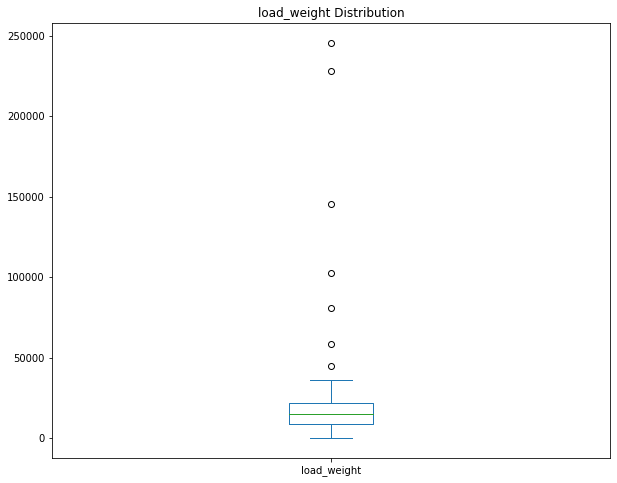

In [111]:
New1_df['load_weight'].plot(kind='box', title='load_weight Distribution', figsize=(10,8))
plt.show()

> Code di atas merupakan code untuk membuat grafik berupa boxplot. Dari boxplot kita bisa melihat apakah pada data terdapat outlier atau tidak. Berdasarkan hasil boxplot di atas terdapat outlier pada data yaitu data yang menjauh dari penyebaran data, sehingga perlu di lakukan handling outlier

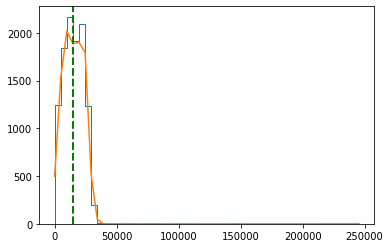

In [112]:
load_weight = New1_df['load_weight']
density = stats.gaussian_kde(load_weight)
n, x, _ = plt.hist(load_weight, histtype='step', bins=50)  
plt.plot(x, density(x)*10**7.7)
plt.axvline(load_weight.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(load_weight.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

> Code di atas merupakan code untuk melihat grafik distribusi dari data, yang nantinya akan menentukan handling outlier yang di gunakan. Sebelum melakukan handling outlier kita harus mengetahui terlebih dahulu distibusi dari data.

> Jika data **berdistribusi normal**, handling outlier yang digunakan adalah **Z score** dan apabila data **berdistribusi berbentuk skew** baik kekiri maupun kekanan, handling outlier yang digunakan adalah **Tukey**

> Dari hasil di atas, diketahui bahwa data yang kita punya miliki distribusi berbentuk skew ke kanan, sehingga handling outlier yang digunakan adalah **Tukey**

In [113]:
New1_df['load_weight'].quantile([0.25, 0.5, 0.75])

0.25     8820.0
0.50    14920.0
0.75    21660.0
Name: load_weight, dtype: float64

In [114]:
quartiles = np.percentile(New1_df['load_weight'], [25, 50, 75])

print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])

Q1: 8820.000
Median: 14920.000
Q3: 21660.000


In [115]:
Q1 = quartiles[0]
Q3 = quartiles[2]
IQR = quartiles[2] - quartiles[0]

> Untuk menggunakan Tukey pada handling outlier, kita harus menentukan terlebih dahulu quartil pada data supaya bisa mencari batas atas dan batas bawah pada aturan Tukey, yang mana pada Tukey memiliki rumus untuk mendeteksi adanya outlier sebagai berikut:

> ${Q_{3}+1.5*IQR}$ => sebagai batas atas

> ${Q_{1}-1.5*IQR}$ => sebagai batas bawah

> Pada aturan Tukey, jika terdapat data yang berada di luar batas bawah dan batas atas, maka data tersebut dudeteksi sebagai data outlier

> Dari code di atas, diperolah Q1, Q3 dan IQR yang nanti di gunakan untuk mencari nilai batas bawah dan batas atas

In [116]:
Q1 - (1.5*IQR)

-10440.0

> Code di atas merupakan code untuk menghitung batas bawah pada aturan Tukey, dari hasil code di atas diperoleh nilai batas bawah adalah -10440.0

In [117]:
Q3 + (1.5*IQR)

40920.0

> Code di atas merupakan code untuk menghitung batas atas pada aturan Tukey, dari hasil code di atas diperoleh nilai batas atas adalah 40920.0

In [118]:
New1_df[
    (New1_df['load_weight'] > 40920.0)
    ].sort_values('report_date', ascending = True)

,index,report_date,load_time,load_type,load_weight,dropoff_site
368,836,2021-01-07,2021-01-07 02:45:00 UTC,GARBAGE COLLECTIONS,44980.0,TDS LANDFILL
2244,5176,2021-02-09,2021-02-09 01:08:00 UTC,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL
3722,8680,2021-03-09,2021-03-09 01:30:00 UTC,GARBAGE COLLECTIONS,145160.0,TDS LANDFILL
4762,12021,2021-03-29,2021-03-29 05:08:00 UTC,GARBAGE COLLECTIONS,58600.0,TDS LANDFILL
8112,20368,2021-05-26,2021-05-26 11:40:00 UTC,GARBAGE COLLECTIONS,80697.0,TDS LANDFILL
8168,20553,2021-05-27,2021-05-27 11:33:00 UTC,GARBAGE COLLECTIONS,245540.0,TDS LANDFILL
9589,23798,2021-06-21,2021-06-21 01:05:00 UTC,GARBAGE COLLECTIONS,227780.0,TDS LANDFILL


In [119]:
New1_df[
    (New1_df['load_weight'] < -10440.0)
    ].sort_values('report_date', ascending = True)

,index,report_date,load_time,load_type,load_weight,dropoff_site


> Setelah kita mengetahui batas atas dan batas bawah, selanjutnya kita melihat apakah ada data yang berada di luar batas atas dan batas bawah. Dari hasil code di atas, diketahui bahwa terdapat data yang berada di luar batas atas, yaitu sebanyak 7 data. Sehingga dapat disimpulkan bahwa pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL terdapat data outlier sebanyak 7 data

In [120]:
New2_df = New1_df.drop(New1_df[New1_df.load_weight > 40920.0].index)
New2_df

,index,report_date,load_time,load_type,load_weight,dropoff_site
0,16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
1,48,2021-01-02,2021-01-02 03:04:00 UTC,GARBAGE COLLECTIONS,26540.0,TDS LANDFILL
2,49,2021-01-02,2021-01-02 03:41:00 UTC,GARBAGE COLLECTIONS,24600.0,TDS LANDFILL
3,50,2021-01-02,2021-01-02 03:31:00 UTC,GARBAGE COLLECTIONS,31620.0,TDS LANDFILL
4,51,2021-01-02,2021-01-02 03:52:00 UTC,GARBAGE COLLECTIONS,21720.0,TDS LANDFILL
...,...,...,...,...,...,...
10686,26054,2021-07-08,2021-07-09 12:00:00 UTC,GARBAGE COLLECTIONS,23060.0,TDS LANDFILL
10687,26053,2021-07-08,2021-07-08 12:47:00 UTC,GARBAGE COLLECTIONS,18320.0,TDS LANDFILL
10688,26059,2021-07-08,2021-07-08 12:51:00 UTC,GARBAGE COLLECTIONS,22480.0,TDS LANDFILL
10689,26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


> Code di atas merupakan code untuk menghapus atau drop data outlier yang berada pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL. Sehingga diperoleh data baru yang sudah dihapus outliernya

In [121]:
New2_df[
    (New2_df['load_weight'] > 40920.0)
    ].sort_values('report_date', ascending = True)

,index,report_date,load_time,load_type,load_weight,dropoff_site


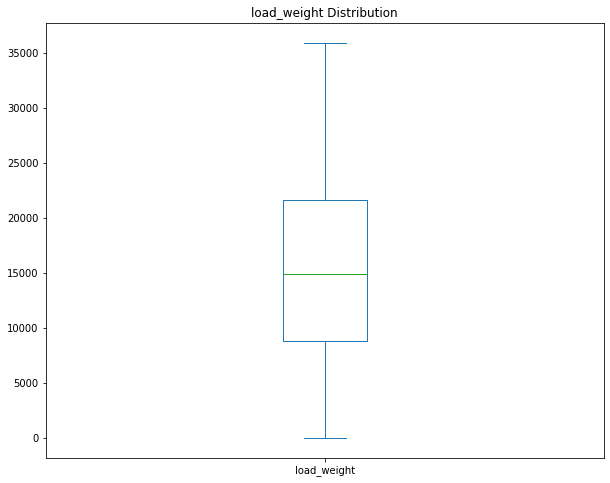

In [122]:
New2_df['load_weight'].plot(kind='box', title='load_weight Distribution', figsize=(10,8))
plt.show()

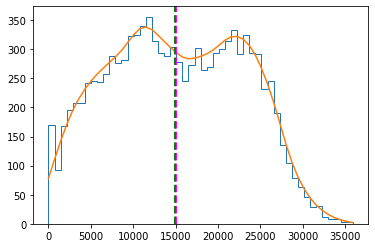

In [123]:
load_weight = New2_df['load_weight']
density = stats.gaussian_kde(load_weight)
n, x, _ = plt.hist(load_weight, histtype='step', bins=50)  
plt.plot(x, density(x)*10**6.9)
plt.axvline(load_weight.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(load_weight.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

> Code di atas merupakan code untuk melihat apakah data outlier sudah terhapus atau belum. Berdasarkan hasil code di atas diketahui bahwa sudah tidak terdapat data outlier pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang diliat dari screening data dan dari grafik boxplot serta distribusi data

In [124]:
persen = (7/len(New1_df))*100
persen

0.0654756337105977

> Kita juga bisa melihat persentase outlier dari data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL dengan menggunakan code di atas. Dari hasil code di atas diperoleh persentase outlier yaitu sebesar 0.065%

In [125]:
New2_df.groupby(['dropoff_site'])['load_weight'].mean().sort_values(ascending=False).reset_index()

,dropoff_site,load_weight
0,TDS LANDFILL,15094.6


In [126]:
New2_df.groupby(['dropoff_site'])['load_weight'].median().sort_values(ascending=False).reset_index()

,dropoff_site,load_weight
0,TDS LANDFILL,14920.0


In [127]:
New2_df1 = pd.DataFrame({'dropoff_site':New2_df['dropoff_site'],
                    'load_weight': New2_df['load_weight']})

New2_df1

,dropoff_site,load_weight
0,TDS LANDFILL,12480.0
1,TDS LANDFILL,26540.0
2,TDS LANDFILL,24600.0
3,TDS LANDFILL,31620.0
4,TDS LANDFILL,21720.0
...,...,...
10686,TDS LANDFILL,23060.0
10687,TDS LANDFILL,18320.0
10688,TDS LANDFILL,22480.0
10689,TDS LANDFILL,1900.0


In [128]:
New2_df1['load_weight'].mode()

0       20.0
1       60.0
2    12020.0
dtype: float64

> Code di atas merupakan code untuk melihat central tendency dari data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan atau didrop outliernya. Sehingga dari hasil di atas dapat di bandingkan central tendency data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL sebelum dan sesudah dikeluarkan outliernya. Berikut perbandingannya:

> **Sebelum dikeluarkan outliernya**

> Mean : 15169.41

> Median : 14920.0

> Modus : 
- 20.0
- 60.0
- 12020.0

> **Setelah dikeluarkan outliernya**

> Mean : 15094.6

> Median : 14920.0

> Modus :  
- 20.0
- 60.0
- 12020.0

> Dari hasil perbandingan central tendency di atas, diketahui bahwa terdapat perbedaan nilai rata - rata data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL sebelum dan sesudah dikeluarkan outliernya, hal ini di sebabkan karena terjadinya pengurangan data pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan outliernya

### 6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

In [129]:
New2_df

,index,report_date,load_time,load_type,load_weight,dropoff_site
0,16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
1,48,2021-01-02,2021-01-02 03:04:00 UTC,GARBAGE COLLECTIONS,26540.0,TDS LANDFILL
2,49,2021-01-02,2021-01-02 03:41:00 UTC,GARBAGE COLLECTIONS,24600.0,TDS LANDFILL
3,50,2021-01-02,2021-01-02 03:31:00 UTC,GARBAGE COLLECTIONS,31620.0,TDS LANDFILL
4,51,2021-01-02,2021-01-02 03:52:00 UTC,GARBAGE COLLECTIONS,21720.0,TDS LANDFILL
...,...,...,...,...,...,...
10686,26054,2021-07-08,2021-07-09 12:00:00 UTC,GARBAGE COLLECTIONS,23060.0,TDS LANDFILL
10687,26053,2021-07-08,2021-07-08 12:47:00 UTC,GARBAGE COLLECTIONS,18320.0,TDS LANDFILL
10688,26059,2021-07-08,2021-07-08 12:51:00 UTC,GARBAGE COLLECTIONS,22480.0,TDS LANDFILL
10689,26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [130]:
New2_df['load_weight'].min()

0.0

In [131]:
New2_df['load_weight'].max()

35900.0

In [132]:
range = New2_df['load_weight'].max() - New2_df['load_weight'].min()
range

35900.0

> Code di atas merupakan code untuk mencari nilai range pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan outliernya. Dari hasil di atas peroleh nilai range sebesar 35900.0, yang di peroleh dari perbedaan antara nilai terbesar dan terkecil pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan outliernya.

> Sehingga dapat disimpulkan bahwa pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan outliernya memiliki nilai range yang sangat besar yang berartikan fluktuasi penyebaran data sangat besar 

In [133]:
variance = New2_df['load_weight'].var()
variance

61689203.067723714

> Code di atas merupakan code untuk mencari nilai varian pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan outliernya. Dari hasil di atas peroleh nilai varian sebesar 61689203.06

> Varians adalah ukuran dari seberapa jauh penyebaran data dari nilai rata-ratanya. Semakin besar nilai varians, semakin jauh data yang kita gunakan tersebar dari nilai rata-ratanya.

> Sehingga dapat disimpulkan bahwa pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan outliernya memiliki nilai varians yang sangat besar yang berartikan penyebaran data menjauh dari rata - ratanya

In [134]:
standar_deviasi = New2_df['load_weight'].std()
standar_deviasi

7854.247453940047

> Code di atas merupakan code untuk mencari nilai standar deviasi pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan outliernya. Dari hasil di atas peroleh nilai standar deviasi sebesar 7854.24 yang mana standar deviasi adalah akar dari nilai varians.

> Varians bertujuan untuk menunjukkan seberapa jauh data-data yang kita miliki tersebar dari nilai rata-ratanya. Sedangkan, standar deviasi bertujuan untuk mengukur data yang menyebar di sekitar mean.

> Sehingga dapat disimpulkan bahwa pada data pembuangan sampah di tempat pembuangan sampah TDS LANDFILL yang telah dikeluarkan outliernya memiliki nilai standar deviasi sebesar 7854.24 yang berarti terdapat sebanyak 7854.24 data  yang menyebar di sekitar mean.

### 7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

In [135]:
New3_df = df.groupby(['dropoff_site','report_date'])['load_weight'].sum().reset_index()
New3_df

,dropoff_site,report_date,load_weight
0,AUSTIN IRON AND METAL,2021-01-05,2.60e+02
1,AUSTIN IRON AND METAL,2021-01-06,2.20e+02
2,AUSTIN IRON AND METAL,2021-01-13,6.40e+02
3,AUSTIN IRON AND METAL,2021-01-19,8.30e+02
4,AUSTIN IRON AND METAL,2021-02-04,1.40e+02
...,...,...,...
813,TDS LANDFILL,2021-07-06,1.19e+06
814,TDS LANDFILL,2021-07-07,1.04e+06
815,TDS LANDFILL,2021-07-08,1.03e+06
816,TDS LANDFILL,2021-07-09,4.94e+03


In [136]:
confidence_interval = stats.norm.interval(0.95, New3_df.load_weight.mean(), New3_df.load_weight.std())
confidence_interval

(-508621.64367672184, 1259260.190227822)

> Code di atas merupakan code untuk melihat confidence interval dari data pembuangan sampah setiap harinya. Confidence interval di atas diperoleh dari data pembuangan sampah di setiap site pada setiap harinya, yang mana dari hasil di atas diperoleh nilai lower bound dan upper bound sebesar -508621.64 dan 1259260.19 dengan confidence level sebesar 95% yang berarti rata -rata berat sampah di setiap site setiap harinya berkisaran pada -508621.64 sampai 1259260.19

> Sehingga berdasarkan hasil analisa di atas, kita dapat memberikan masukan atau saran kepada pemerintah, apabila ingin menambah site baru, harus memiliki kapasitas lebih dari 1259260.19 kg untuk tiap harinya

> Data yang saya gunakan adalah data keseluruhan site, yang sudah di grouping menjadi perhari di setiap sitenya

### 8. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima, jadi gunakan bahasa yang lebih manusiawi!).

> Kasus yang saya ambil adalah, melihat apakah rata - rata berat sampah di dua tempat pembuangan sampah berbeda memiliki nilai yang signifikan atau tidak signifikan. Tempat pembuangan sampah yang digunakan yaitu TDS LANDFILL dan ORGANICS BY GOSH. Serta uji yang digunakan adalah uji t-test dua sampel independent dua arah. 

**Hipotesis**

**H0: μ_TDS_LANDFILL = μ_ORGANICS_BY_GOSH**

**H1: μ_TDS_LANDFILL != μ_ORGANICS_BY_GOSH**

In [137]:
df_TDS_LANDFILL = df[df['dropoff_site']=='TDS LANDFILL'][['report_date','load_weight']].groupby('report_date').sum()
df_ORGANICS_BY_GOSH = df[df['dropoff_site']=='ORGANICS BY GOSH'][['report_date','load_weight']].groupby('report_date').sum()

print('Average load weight of TDS LANDFILL a day: ${}'.format(np.round(df_TDS_LANDFILL.load_weight.mean())))
print('Average load weight of ORGANICS BY GOSH a day: ${}'.format(np.round(df_ORGANICS_BY_GOSH.load_weight.mean())))

Average load weight of TDS LANDFILL a day: $1007305.0
Average load weight of ORGANICS BY GOSH a day: $455368.0


In [138]:
t_stat, p_val = stats.ttest_ind(df_TDS_LANDFILL,df_ORGANICS_BY_GOSH)
print('P-value:',p_val[0])
print('t-statistics:',t_stat[0])

P-value: 1.6663852274235998e-26
t-statistics: 11.726600268402185


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


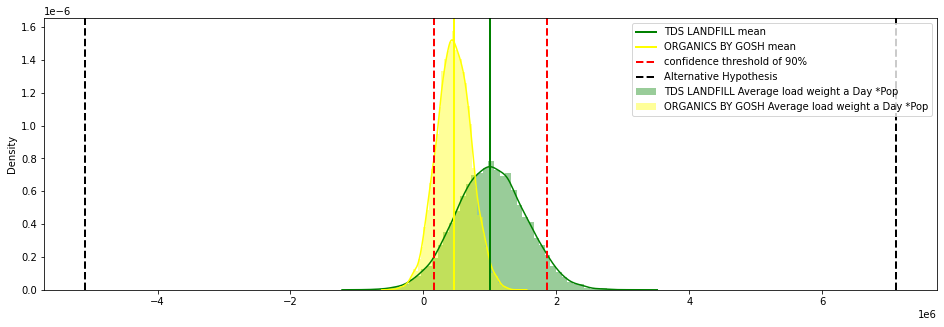

In [139]:
TDS_LANDFILL_pop = np.random.normal(df_TDS_LANDFILL.load_weight.mean(),df_TDS_LANDFILL.load_weight.std(),10000)
ORGANICS_BY_GOSH_pop = np.random.normal(df_ORGANICS_BY_GOSH.load_weight.mean(),df_ORGANICS_BY_GOSH.load_weight.std(),10000)

ci = stats.norm.interval(0.90, df_TDS_LANDFILL.load_weight.mean(), df_TDS_LANDFILL.load_weight.std())
plt.figure(figsize=(16,5))
sns.distplot(TDS_LANDFILL_pop, label='TDS LANDFILL Average load weight a Day *Pop',color='green')
sns.distplot(ORGANICS_BY_GOSH_pop, label='ORGANICS BY GOSH Average load weight a Day *Pop',color='yellow')

plt.axvline(df_TDS_LANDFILL.load_weight.mean(), color='green', linewidth=2, label='TDS LANDFILL mean')
plt.axvline(df_ORGANICS_BY_GOSH.load_weight.mean(), color='yellow',  linewidth=2, label='ORGANICS BY GOSH mean')

plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2, label='confidence threshold of 90%')
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)

plt.axvline(TDS_LANDFILL_pop.mean()+t_stat[0]*TDS_LANDFILL_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(TDS_LANDFILL_pop.mean()-t_stat[0]*TDS_LANDFILL_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

> Dari hasil code di atas, didapatkan nilai p-value atau nilai probability sampel rata - rata yang diperoleh bukan secara kebetulan yaitu sebesar 1.6663852274235998e-26. Pada code di atas juga saya menggunakan confidence level sebesar 95% atau alpa sebesar 5%

> Berdasarka hasil di atas diketahui bahwa p-value < alpa, yang berarti tolak H0. Sehingga dapat kesimpulan bahwa ada perbedaan signifikan antara rata - rata berat sampah di tempat pembuangan sampah TDS LANDFILL dengan tempat pembuangan sampah ORGANICS BY GOSH.

### **Question**

#### 1.Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

> Teknik yang saya pilih adalah Tukey, karna data yang saya miliki berdistribusi skew ke kanan, sehingga untuk handling outlier menggunkan tukey

#### 2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

> Confidence interval di peroleh dari menentukan confidence level sehingga didapatkan nilai lower bound dan upper bound yang merupakan nilai confidence interval, nilai lower bound dan upper bound merupakan nilai interval rata - rata yang diperoleh.

#### 3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

> Jenis uji hipotesis yang saya gunakan adalah uji t-test dua sampel independent dua arah, karna saya menggunakan dua data sampel yang saling bebas dan dua arah. 

## **Problem 2 (Math/Calculus)**

In [140]:
df

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
5,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
11,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


> menampilkan kembali data frame untuk mereview data

In [141]:
df_group = df.groupby(['report_date'])['load_weight'].sum().reset_index()
df_group

,report_date,load_weight
0,2021-01-02,2.17e+06
1,2021-01-04,2.92e+06
2,2021-01-05,2.39e+06
3,2021-01-06,2.40e+06
4,2021-01-07,2.44e+06
...,...,...
160,2021-07-05,1.90e+06
161,2021-07-06,1.92e+06
162,2021-07-07,1.55e+06
163,2021-07-08,1.42e+06


> Code di atas merupakan code untuk mengquery data berdasarkan report_date jumlah load_weight setiap harinya

In [142]:
X = df_group.index
X

RangeIndex(start=0, stop=165, step=1)

> Code di atas merupakan code untuk mendefinisikan variabel X sebagai index dataframe hasil groupby

In [143]:
X.shape

(165,)

In [144]:
Y = df_group['load_weight']
Y

0      2.17e+06
1      2.92e+06
2      2.39e+06
3      2.40e+06
4      2.44e+06
         ...   
160    1.90e+06
161    1.92e+06
162    1.55e+06
163    1.42e+06
164    1.20e+05
Name: load_weight, Length: 165, dtype: float64

> Code di atas merupakan code untuk mendefinisikan variabel Y sebagai load_weight yang di groupby berdasarkan report_date

In [145]:
w_hari_ini = Y[164]
w_hari_ini

120340.0

In [146]:
Y.shape

(165,)

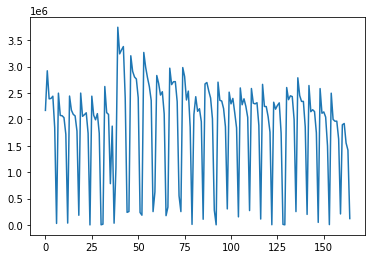

In [147]:
plt.plot(X,Y)

> Code di atas merupakan code untuk membuat grafik berupa plot dari variabel X dan variabel Y

In [148]:
diff1 = abs(np.diff(Y)/np.diff(X))
diff1

array([7.50130000e+05, 5.31720000e+05, 8.01000000e+03, 4.17800000e+04,
       5.93380000e+05, 1.81681000e+06, 2.46847000e+06, 4.22690000e+05,
       5.34000000e+03, 3.57300000e+04, 3.15860000e+05, 1.68213000e+06,
       2.40679000e+06, 2.67390000e+05, 7.91300000e+04, 2.97600000e+04,
       2.86770000e+05, 1.59572000e+06, 2.31477000e+06, 4.40200000e+05,
       3.03900000e+04, 3.62200000e+04, 3.88890000e+05, 1.73503000e+06,
       2.43934000e+06, 3.60620000e+05, 8.69800000e+04, 1.16700000e+05,
       3.72670000e+05, 1.73345000e+06, 1.17200000e+04, 2.60815000e+06,
       4.94950000e+05, 3.38800000e+04, 1.31158000e+06, 1.08996000e+06,
       1.83900000e+06, 1.05132000e+06, 2.66098000e+06, 5.04400000e+05,
       7.47900000e+04, 6.37300000e+04, 9.73200000e+05, 2.16812000e+06,
       1.59200000e+04, 2.95084000e+06, 2.95220000e+05, 1.06440000e+05,
       3.87200000e+04, 3.54825000e+05, 2.17421500e+06, 5.08200000e+04,
       3.08313000e+06, 2.78730000e+05, 1.98670000e+05, 1.69280000e+05,
      

> Code di atas merupakan code untuk menlihat turunan pertama dari data load weight yang di groupby berdasarkan report_date, atau yang di definisikan sebagai v

In [149]:
diff1.shape

(164,)

In [150]:
v_baris_terahir = diff1[-1]
v_baris_terahir 

1297310.0

In [151]:
w_besok = w_hari_ini + (v_baris_terahir*1) 
w_besok

1417650.0

> Code di atas merupakan code untuk melakukan forecasting banyaknya load sampah pada hari besok. Sehingga dari hasil di atas diperoleh prediksi banyaknya load sampah pada hari besok atau pada tanggai 10 Juli 2021 adalah sebesar 1417650.0 kg

### **Question**

#### 1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

> Teknik yang saya gunakan untuk melakukan turunan pertama adalah teknik numerik, dikarnakan dari kasus soal di atas tidak terdapat suatu fungsi 

#### 2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

> Iya, karena pada kasus di atas saya menggunakan rumus matematis untuk menghitung turunan pertama pada v, yaitu v = delta w / delta t. Dimana v merupakan turunan pertama, delta w merupakan turunan dari data load weight yang di groupby berdasarkan report_date dan delta t merupakan turunan dari index dataframe hasil groupby

#### 3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

> Berdasarkan hasil perhitungan di atas diperoleh load weight untuk hari esok adalah sebesar 1417650.0 kg

# **Conclusions**

> Dari hasil analisa di atas, dapat disimpulkan sebagai berikut:

> - Pada **Problem 1 (Stats)** di peroleh informasi bahwa pada data pembuangan sampah terdapat tipe load sampah sebanyak 14 tipe dan terdapat tempat pembuangan sampah sebanyak 14 tempat di kota Austin 

> - Dari hasil analisa di peroleh nilai central tendency disetiap masing - masing tempat pembuangan sampah serta pada data pembuang sampah di tempat pembuangan sampah TDS LANDFILL memiliki data outlier dan melakukan handling outlier menggunakan Tukey karna data pada tempat pembuangan sampah TDS LANDFILL memiliki distribusi berbentuk skew

> - Dan pada Problem 1 (Stats) juga, saya melakukan analisa uji hipotesis pada kasus rata - rata data tempat pembuangan sampah TDS LANDFILL dengan tempat pembuangan sampah ORGANICS BY GOSH dengan menggunakan uji t-test dua sampel independent dua arah, yang memiliki hasil H0 ditolak, sehingga dapat disimpulkan bahwa ada perbedaan signifikan antara rata - rata berat sampah di tempat pembuangan sampah TDS LANDFILL dengan tempat pembuangan sampah ORGANICS BY GOSH.

> - Pada **Problem 2 (Math/Calculus)** di peroleh kesimpulan hasil prediksi banyaknya load sampah pada hari besok atau pada tanggai 10 Juli 2021 adalah sebesar 1417650.0 kg